In [0]:
import tensorflow as tf
import numpy as np

In [0]:
list_of_prob = [.01,0.08,0.1,0.21,0.35,0.15,0.05,0.05]
#data points = 8
data_points = []

In [0]:
assert sum(list_of_prob)==1.0

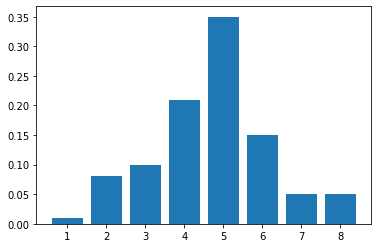

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.bar([1,2,3,4,5,6,7,8],list_of_prob)
plt.show()

In [0]:
def normal(x,mu,sigma):
  return tf.multiply(tf.divide(1,(tf.multiply(tf.sqrt(tf.multiply(2.0,3.14)),sigma))),tf.exp(tf.multiply(-0.5,tf.square(tf.divide(tf.subtract(x,mu),sigma)))))

In [0]:
#gaussian_probs = [normal(i,400,30).numpy() for i in [x for x in range(1,800+1)]]
number_list = np.asarray([x for x in range(1,800+1)],dtype = np.float32)
gaussian_probs = normal(number_list,400.0,30.0)

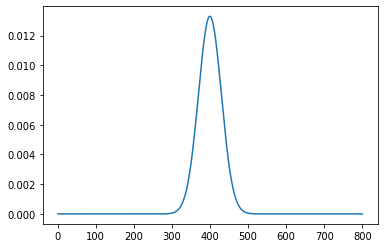

In [7]:
plt.plot(number_list,gaussian_probs)
plt.show()

In [0]:
points =[]
k = 0
for i in range(201):
  points.append(1+k)
  k = k+(7/200)

points = np.asarray(points,np.float32)

In [0]:
#before training
mu = 52.2
sigma = 24.2

In [0]:
gaussian_probs = normal(points,mu,sigma)

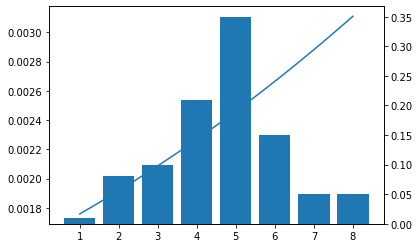

In [21]:
plt.plot(points,gaussian_probs)
ax2 = plt.twinx()
ax2.bar([1,2,3,4,5,6,7,8],list_of_prob)
plt.show()

In [22]:
mu = tf.Variable(mu,trainable = True)
sigma = tf.Variable(sigma,trainable = True)
#print(W2)
optimizer = tf.optimizers.Adam(learning_rate=0.1)

epoch  = 1500

#dataset = tf.data.Dataset.from_tensor_slices((train_images.astype(np.float32),
#                                              labels.astype(np.float32))).batch(32)

x = np.asarray([1,2,3,4,5,6,7,8],dtype = np.float32)
y_true = [.01,0.08,0.1,0.21,0.35,0.15,0.05,0.05]
for i in range(epoch):
  #for (batch, (images, lab)) in enumerate(dataset):
    with tf.GradientTape() as tape:
      y_pred = tf.multiply(tf.divide(1,(tf.multiply(tf.sqrt(tf.multiply(2.0,3.14)),sigma))),tf.exp(tf.multiply(-0.5,tf.square(tf.divide(tf.subtract(x,mu),sigma)))))
      k = tf.losses.KLDivergence()
      loss_value = k(y_true,y_pred)

      
    grads = tape.gradient(loss_value,[mu,sigma])

    optimizer.apply_gradients(zip(grads,[mu,sigma]))
    if i%100==0:
      print("loss on {} epoch is {}".format(i,loss_value))
    

loss on 0 epoch is 4.27473783493042
loss on 100 epoch is 3.376173734664917
loss on 200 epoch is 3.123945951461792
loss on 300 epoch is 2.931814670562744
loss on 400 epoch is 2.684305429458618
loss on 500 epoch is 2.2157087326049805
loss on 600 epoch is 0.08712564408779144
loss on 700 epoch is 0.05657017603516579
loss on 800 epoch is 0.056569285690784454
loss on 900 epoch is 0.05656930431723595
loss on 1000 epoch is 0.05656921863555908
loss on 1100 epoch is 0.05656921863555908
loss on 1200 epoch is 0.05656930431723595
loss on 1300 epoch is 0.05656930431723595
loss on 1400 epoch is 0.05656930431723595


In [0]:
#after training
gaussian_probs = normal(points,mu,sigma)

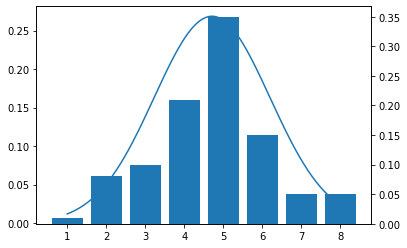

In [24]:
plt.plot(points,gaussian_probs)
ax2 = plt.twinx()
ax2.bar([1,2,3,4,5,6,7,8],list_of_prob)
plt.show()